# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Detection of Lung Cancer</p>

<p style="text-align:center; ">
<img src="https://st.depositphotos.com/1909187/4810/i/450/depositphotos_48100511-stock-photo-lung-cancer-tumor-detail.jpg" style='width: 300px; height: 300px;'>
</p>

Cancer is known for its morality and deadly nature which damages our tissues and near-by organs effectively, hence, creating several body problems. Globally, Lung cancer plays a vi-tal role in the cancer-related mortality rate and is known for its deadly nature, it happens when abnormal cells start to grow in our lungs in an uncontrolled manner forming a tumor in our lungs that infiltrate in other parts of our body. Lung cancer is fatal and most dangerous because it can’t be detected easily at the early stage and is seen when it has already spread its effect in most parts of the body making its diagnosis more difficult or nearly impossible.

# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Importing Libraries </p>

In [1]:
#data frames and data manipulation
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

#Model 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2024-02-26 16:42:20.764391: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 16:42:20.764524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 16:42:20.906191: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Pre-Processing </p>

In [2]:
#Load the dataset
df=pd.read_csv("/kaggle/input/lung-cancer-detection/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


**Brief description of the dataset:**

**GENDER:** The gender of the individual (Male or Female).

**AGE:** The age of the individual in years.

**SMOKING:** Indicates if the individual smokes ('2' for yes, '1' for no).

**YELLOW_FINGERS:** Denotes the presence of yellow fingers ('2' for yes, '1' for no), a potential sign associated with smoking.

**ANXIETY:** Indicates if the individual experiences anxiety ('2' for yes, '1' for no).

**PEER_PRESSURE:** Suggests if peer pressure influences the individual's habits ('2' for yes, '1' for no).

**CHRONIC DISEASE:** Indicates the presence of any chronic diseases ('2' for yes, '1' for no).

**FATIGUE:** Denotes if the individual frequently feels fatigued ('2' for yes, '1' for no).

**ALLERGY:** Indicates if the individual has allergies ('2' for yes, '1' for no).

**WHEEZING:** Represents whether the individual experiences wheezing ('2' for yes, '1' for no).

**ALCOHOL CONSUMING:** Indicates alcohol consumption habits ('2' for yes, '1' for no).

**COUGHING:** Represents whether the individual has a cough ('2' for yes, '1' for no).

**SHORTNESS OF BREATH:** Indicates if the individual experiences shortness of breath ('2' for yes, '1' for no).

**SWALLOWING DIFFICULTY:** Denotes difficulty in swallowing ('2' for yes, '1' for no).

**CHEST PAIN:** Indicates the presence of chest pain ('2' for yes, '1' for no).

**LUNG_CANCER:** The target variable, indicating whether the individual has lung cancer ('2' for yes, '1' for no).

In [3]:
df.shape
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

Check for **null** value

In [4]:
#Check for missing values
print(df.isnull().sum())

#Remove missing values 
df = df.dropna()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


Convert **'1' for 'YES' and '0' for 'NO'** to align with common practices in binary classification.

In [5]:
df.columns = df.columns.str.strip()
#Convert '2' to '1' and '1' to '0'
new_columns = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                      'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
                      'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
                      'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for col in new_columns:
    if col in df.columns:
        df[col] = df[col].map({2: 1, 1: 0})

# Convert 'YES' to '1' and 'NO' to '0' for the 'LUNG_CANCER' column
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Exploratory Data Analysis (EDA) </p>

# Box plot to show the relationship between age and gender

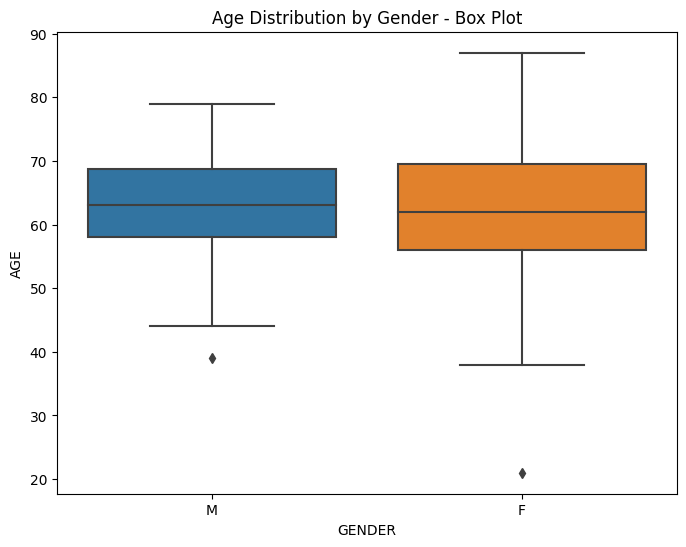

In [6]:
#Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='GENDER', y='AGE', data=df)
plt.title('Age Distribution by Gender - Box Plot')
plt.show()

The box plot visualizes the age distribution for two gender categories, Male (M) and Female (F). For both categories, the median age appears to be roughly the same, around the mid-60s. However, the age range for males extends slightly lower than for females, as indicated by the longer lower whisker and the presence of an outlier, suggesting that there are younger males in the dataset. The interquartile range (the box itself) is similar for both genders, indicating similar variability in age distribution among the middle 50% of the samples for both genders.

# Histogram for specified conditions

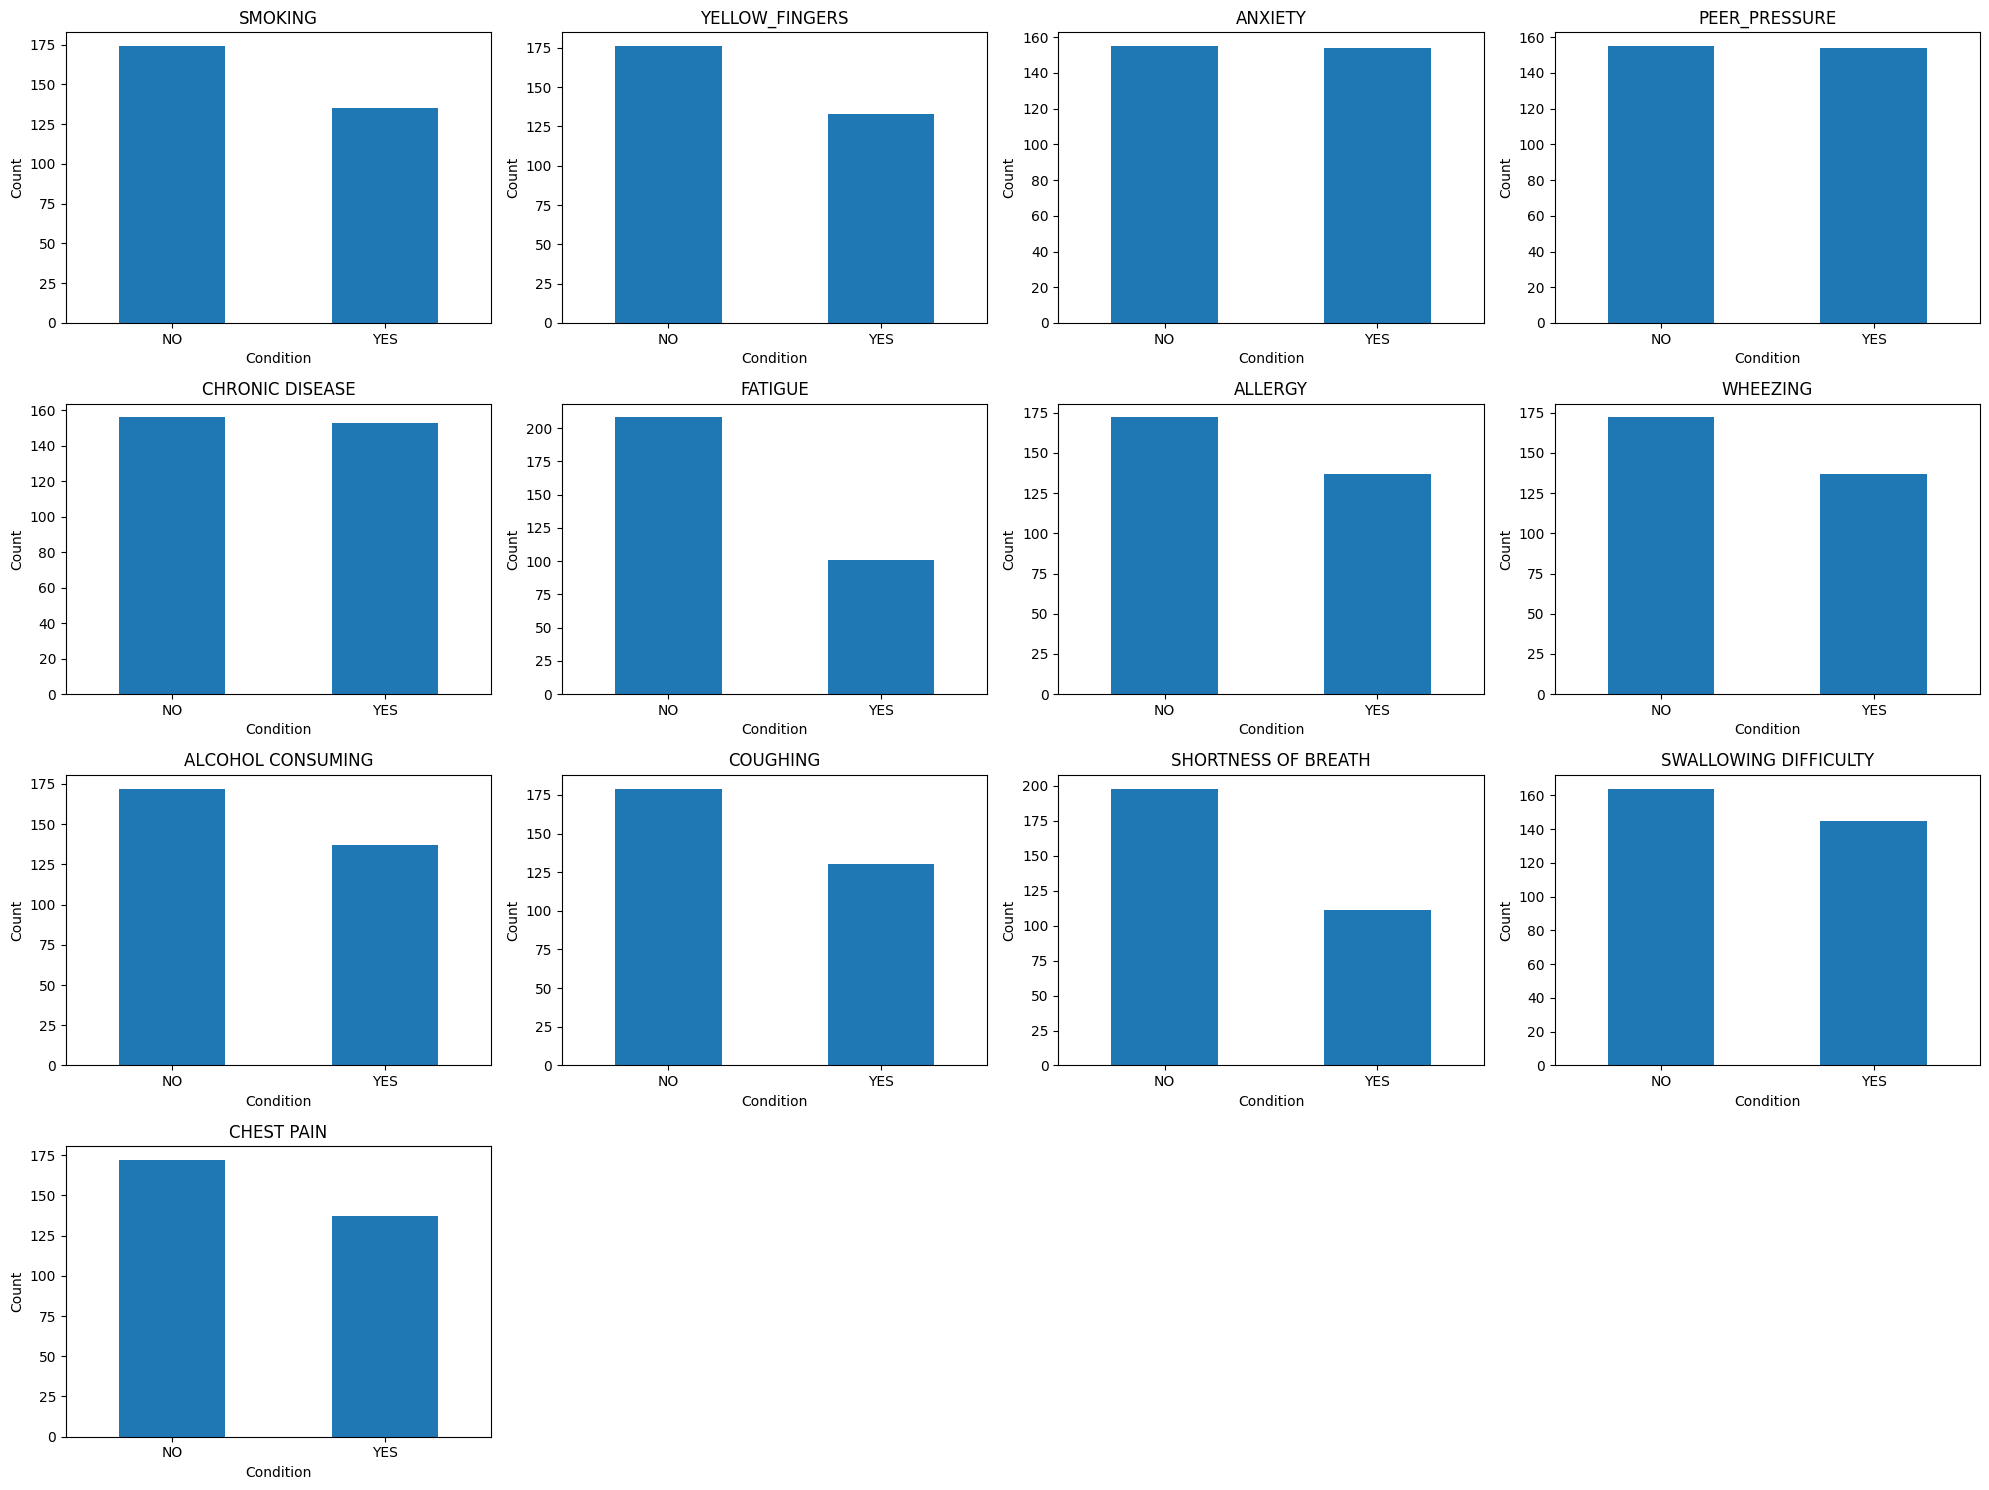

In [7]:
def plot_histograms(dataframe, columns_list):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns_list, 1):
        plt.subplot(4, 4, i)
        dataframe[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.xticks([0, 1], ['NO', 'YES'], rotation=0)
        plt.xlabel('Condition')
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_histograms(df, new_columns)

Most conditions appear to have a higher frequency of 'No' responses compared to 'Yes', indicating that a larger number of individuals in the sample do not exhibit these conditions. However, 'FATIGUE' and 'SHORTNESS OF BREATH' show a significantly higher number of 'Yes' responses, suggesting these symptoms are more commonly reported among the participants. 

# Frequency of 'YES' response for each conditions

/tmp/ipykernel_19/4141922292.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, pad=0.1)


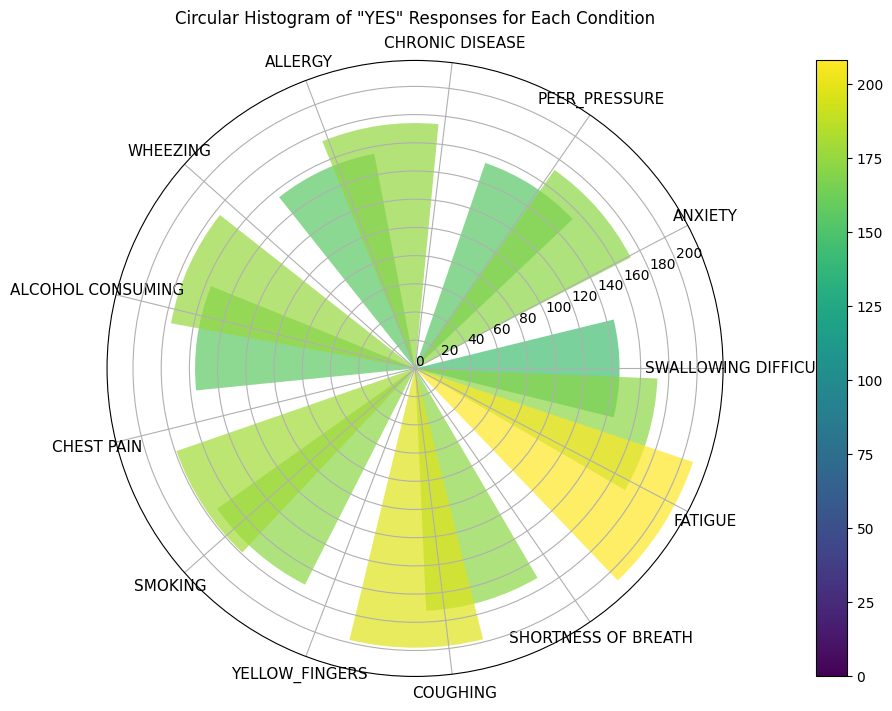

In [8]:
def create_circular_histogram(dataframe, columns_list):
    yes_counts = dataframe[columns_list].sum().sort_values()
    
    #Set up plot
    plt.figure(figsize=(12, 8))
    ax = plt.subplot(111, polar=True)
    width = (2 * np.pi) / len(yes_counts) #Recalculate width
    colors = plt.cm.viridis(yes_counts.values / float(max(yes_counts.values)))

    #Plotting balls
    bars = ax.bar(yes_counts.index, yes_counts.values, width=width, color=colors, alpha=0.7)

    #Set circumferences and radius
    ax.set_xticks(np.linspace(0, 2 * np.pi, len(yes_counts), endpoint=False))
    ax.set_xticklabels(yes_counts.index, fontsize=11, rotation=90)
    ax.set_yticks(np.arange(0, max(yes_counts.values), 20))
    ax.set_yticklabels(np.arange(0, max(yes_counts.values), 20))

    #Add legend and title
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(0, max(yes_counts.values)))
    sm.set_array([])
    plt.colorbar(sm, pad=0.1)
    ax.set_title('Circular Histogram of "YES" Responses for Each Condition', va='bottom')
    ax.grid(True)

    plt.show()

create_circular_histogram(df, new_columns)

The histogram indicates a relatively uniform distribution across various health conditions, implying a potential correlation among them. This uniformity might suggest that the presence of one condition could be associated with the likelihood of others, which collectively could contribute to an increased risk of lung cancer.

# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Feature Engineering </p>


Create interaction terms to explore potential synergistic effects between demographic factors (like gender) and health conditions (like smoking). A cumulative risk score was created by summing various health condition indicators, providing a single metric that represents the overall health risk. Polynomial features for 'AGE' were generated to capture any non-linear relationships between age and lung cancer risk. Additionally, one-hot encoding was applied to the binned age categories, allowing machine learning models to better interpret these as distinct groups. Each of these steps aims to enhance the dataset's predictive power by uncovering more complex relationships within the data.


Transforming 'AGE' into bins or polynomial terms to helps in modeling non-linear relationships and interactions with the risk of lung cancer, which may not be captured by the raw numerical age. Similarly, encoding 'GENDER' allows for the inclusion of categorical data in a format that machine learning models can utilize, potentially revealing differences in disease prevalence or risk factors between genders. 

In [9]:
# Binning 'AGE' and One-Hot Encoding for Binned Age
bins = [0, 30, 60, 90]
labels = ['Young', 'Middle', 'Senior']
df['AGE_BINNED'] = pd.cut(df['AGE'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['AGE_BINNED'])

# One-Hot Encoding 'GENDER'
ohe = OneHotEncoder()
df_gender_encoded = ohe.fit_transform(df[['GENDER']]).toarray()
gender_columns = ohe.get_feature_names_out(['GENDER'])
df[gender_columns] = df_gender_encoded

# Drop the original 'GENDER' column
df = df.drop('GENDER', axis=1)

# Interaction between Gender and Smoking
df['GENDER_M_SMOKING'] = df['GENDER_M'] * df['SMOKING']

# Cumulative Risk Score
risk_factors = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE']
df['CUMULATIVE_RISK'] = df[risk_factors].sum(axis=1)

# Polynomial Features for Age
df['AGE_SQUARED'] = df['AGE'] ** 2
df['AGE_CUBED'] = df['AGE'] ** 3

df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,LUNG_CANCER,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED
0,69,0,1,1,0,0,1,0,1,1,...,1,False,False,True,0.0,1.0,0.0,2,4761,328509
1,74,1,0,0,0,1,1,1,0,0,...,1,False,False,True,0.0,1.0,1.0,2,5476,405224
2,59,0,0,0,1,0,1,0,1,0,...,0,False,True,False,1.0,0.0,0.0,1,3481,205379
3,63,1,1,1,0,0,0,0,0,1,...,0,False,False,True,0.0,1.0,1.0,3,3969,250047
4,63,0,1,0,0,0,0,0,1,0,...,0,False,False,True,1.0,0.0,0.0,1,3969,250047


Using clustering to group these conditions patterns where certain health conditions often occur together.

In [10]:
kmeans = KMeans(n_clusters=3)
df['CONDITION_CLUSTER'] = kmeans.fit_predict(df[risk_factors])
df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,...,AGE_BINNED_Young,AGE_BINNED_Middle,AGE_BINNED_Senior,GENDER_F,GENDER_M,GENDER_M_SMOKING,CUMULATIVE_RISK,AGE_SQUARED,AGE_CUBED,CONDITION_CLUSTER
0,69,0,1,1,0,0,1,0,1,1,...,False,False,True,0.0,1.0,0.0,2,4761,328509,1
1,74,1,0,0,0,1,1,1,0,0,...,False,False,True,0.0,1.0,1.0,2,5476,405224,0
2,59,0,0,0,1,0,1,0,1,0,...,False,True,False,1.0,0.0,0.0,1,3481,205379,2
3,63,1,1,1,0,0,0,0,0,1,...,False,False,True,0.0,1.0,1.0,3,3969,250047,1
4,63,0,1,0,0,0,0,0,1,0,...,False,False,True,1.0,0.0,0.0,1,3969,250047,2


# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Model </p>


Let's study about different models which are :-
1. Logistic Regression Model
2. Gaussian Naive Bayes Model
3. Bernoulli Naive Bayes Model
4. Support Vector Machine Model
5. Random Forest Model

# Data Processing

In [11]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 0 60]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62


The Accuracy of Logistic Regression is 98.39 %


# Gaussian Naive Bayes Model

Gaussian Naive Bayes is a machine learning classification technique based on a probablistic approach that assumes each class follows a normal distribution. It assumes each parameter has an independent capacity of predicting the output variable. It is able to predict the probability of a dependent variable to be classified in each group.Gaussian distribution is also called normal distribution. Normal distribution is a statistical model that describes the distributions of continuous random variables in nature and is defined by its bell-shaped curve.

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 0  2]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.98      0.98        60

    accuracy                           0.95        62
   macro avg       0.48      0.49      0.49        62
weighted avg       0.94      0.95      0.94        62


The Accuracy of Gaussian Naive Bayes is 95.16 %


# Bernoulli Naive Bayes Model

Bernoulli Naive Bayes is a subcategory of the Naive Bayes Algorithm. It is used for the classification of binary features such as ‘Yes’ or ‘No’, ‘1’ or ‘0’, ‘True’ or ‘False’ etc. Here it is to be noted that the features are independent of one another. Bernoulli Naive Bayes is basically used for spam detection, text classification, Sentiment Analysis, used to determine whether a certain word is present in a document or not. 

In [14]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 2 58]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62


The Accuracy of Bernoulli Naive Bayes is 95.16 %


# Support Vector Machine Model

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [15]:
svm = SVC(C = 100, gamma = 0.002)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 3 57]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62


The Accuracy of Support Vector Machine is 93.55 %


# Random Forest

Random Forest is a robust and versatile machine learning algorithm well-suited for classification tasks, like predicting lung cancer in your dataset. Its ensemble approach, which combines multiple decision trees, helps in reducing the risk of overfitting, making it generally more accurate and stable compared to a single decision tree. Additionally, Random Forest can handle both categorical and numerical data, is less sensitive to outliers, and provides useful insights into feature importance, aiding in understanding which factors most influence the prediction.

In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_conf = confusion_matrix(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
rf_acc = round(accuracy_score(y_test, rf_predictions)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rf_conf}")
print(f"\nClassification Report : \n\n{rf_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rf_acc} %")

Confusion Matrix : 

[[ 1  1]
 [ 1 59]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


The Accuracy of Random Forest Classifier is 96.77 %


The Random Forest model achieved a high accuracy of approximately 96.77%, proving that it was very effective in predicting lung cancer in the given dataset. This suggests strong predictive performance and a good fit to the data after feature engineering process.

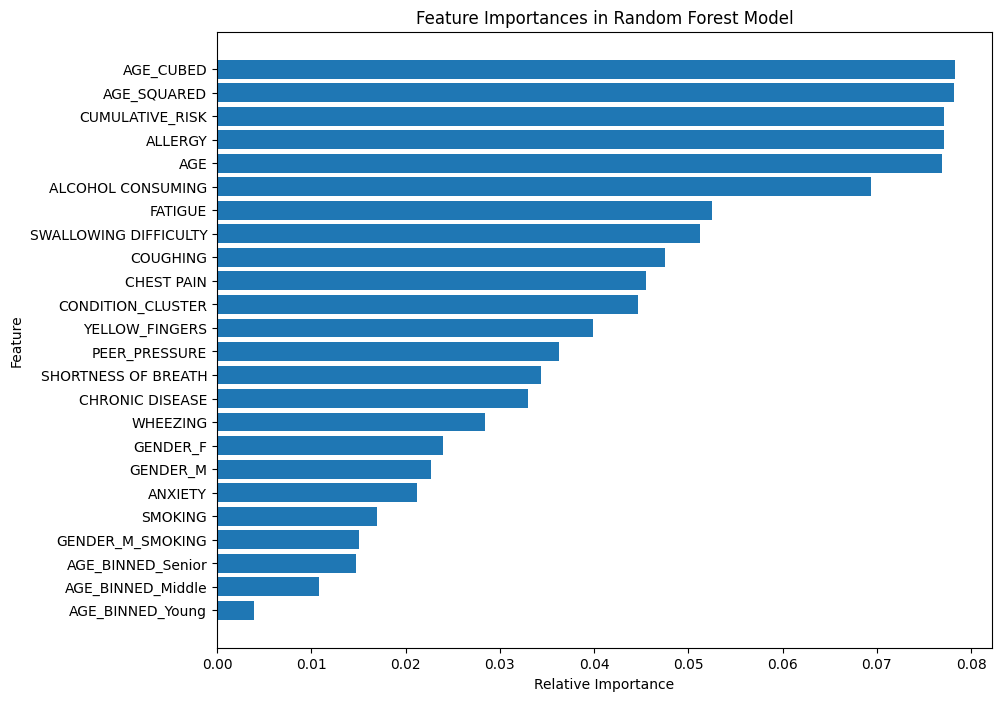

In [17]:
feature_importances = rf_model.feature_importances_

# Sorting the feature importances in descending order
sorted_idx = feature_importances.argsort()

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()